### Import libraries

In [6]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

### Load dataset

In [7]:
df = pd.read_csv("dataset/bank-marketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Handle missing values

In [8]:
# Remove "unknown" rows
df = df.dropna()

#### Handle outliers

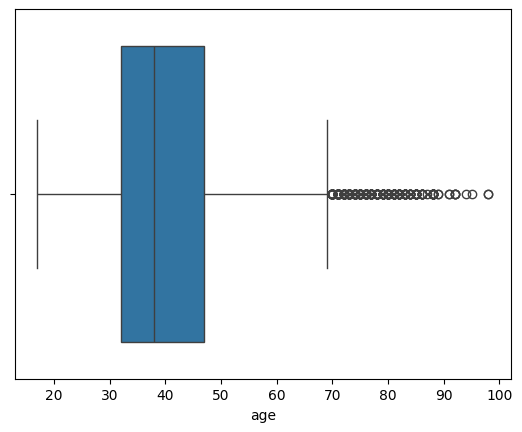

In [9]:
# Very different from other data (age=150)
sns.boxplot(x=df['age'])
plt.show()

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

### Suitable feature coding techniques

In [10]:
# Drop columns
df = df.drop(
    columns=["poutcome", "duration", "campaign", "pdays", "previous", "emp_var_rate", "cons_price_idx", "cons_conf_idx",
             "euribor3m", "nr_employed"])

# Initialize LabelEncoders for categorical columns
label_encoders = {}

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop(columns=["y"])
y = df["y"]

# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train SVM model

In [11]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

### Save models

In [12]:
os.makedirs("models", exist_ok=True)
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(label_encoders, "models/encoder.pkl")
joblib.dump(svm_model, "models/svm_model.pkl")
print("Models saved successfully!")

Models saved successfully!
